# step1:Business problem understanding

**Educational institutions and tutoring centers aim to identify key factors influencing students' academic performance and develop targeted intervention strategies to improve outcomes. The goal is to understand the impact of various activities, study patterns, and previous scores on a student's performance index and provide personalized recommendations to optimize their learning strategies.**



In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV


# Step2-Data Understanding

**#load data and understand every variable**

In [34]:
df=pd.read_csv("C:\\Users\\Pooja\\Student_Performanc_model\\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


**Dataset Understanding**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [36]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [37]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [38]:
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

In [39]:
df["Hours Studied"].value_counts()

Hours Studied
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64

In [40]:
df["Previous Scores"].unique()

array([99, 82, 51, 52, 75, 78, 73, 45, 77, 89, 91, 79, 47, 72, 83, 54, 96,
       74, 85, 61, 62, 84, 94, 90, 44, 70, 67, 97, 59, 55, 68, 63, 46, 76,
       43, 81, 93, 98, 48, 92, 64, 88, 60, 87, 40, 69, 80, 95, 49, 50, 53,
       71, 56, 58, 66, 65, 57, 41, 42, 86], dtype=int64)

In [41]:
df["Previous Scores"].value_counts()

Previous Scores
54    216
87    208
56    192
62    184
89    182
60    181
53    181
77    181
52    176
58    176
57    176
49    175
66    175
65    175
84    175
91    175
97    174
79    174
40    173
83    173
75    172
70    172
93    172
47    172
92    172
90    172
42    171
44    170
48    170
95    169
41    169
67    168
43    167
73    166
61    165
78    165
88    164
59    163
63    163
46    163
86    162
81    161
71    159
99    159
85    159
96    159
98    158
45    154
69    153
80    153
68    153
82    148
94    148
72    148
64    147
55    144
74    143
76    142
51    140
50    123
Name: count, dtype: int64

In [42]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [44]:
df["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

In [45]:
df["Sleep Hours"].value_counts()

Sleep Hours
8    1804
7    1676
6    1673
9    1622
4    1619
5    1606
Name: count, dtype: int64

In [46]:
df["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7], dtype=int64)

In [47]:
df["Sample Question Papers Practiced"].value_counts()

Sample Question Papers Practiced
6    1059
9    1051
3    1035
5    1028
8    1026
7     987
1     978
4     955
0     951
2     930
Name: count, dtype: int64

In [48]:
df["Performance Index"].unique()

array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.])

In [49]:
df["Performance Index"].value_counts()

Performance Index
67.0     187
45.0     185
56.0     181
49.0     181
40.0     180
        ... 
14.0       7
99.0       6
11.0       5
100.0      3
10.0       1
Name: count, Length: 91, dtype: int64

In [50]:
continous=["Performance Index","Previous Scores"]
Discrete_count=["Hours Studied","Sleep Hours","Sample Question Papers Practiced	Performance "]
Discrete_Categorical=["Extracurricular Activities"]

# Step:3 :Data Preprocessing

In [51]:
#Exploratory Data Analysis

In [52]:
df[continous].describe()

,Performance Index,Previous Scores
count,10000.000000,10000.000000
mean,55.224800,69.445700
std,19.212558,17.343152
min,10.000000,40.000000
25%,40.000000,54.000000
50%,55.000000,69.000000
75%,71.000000,85.000000
max,100.000000,99.000000


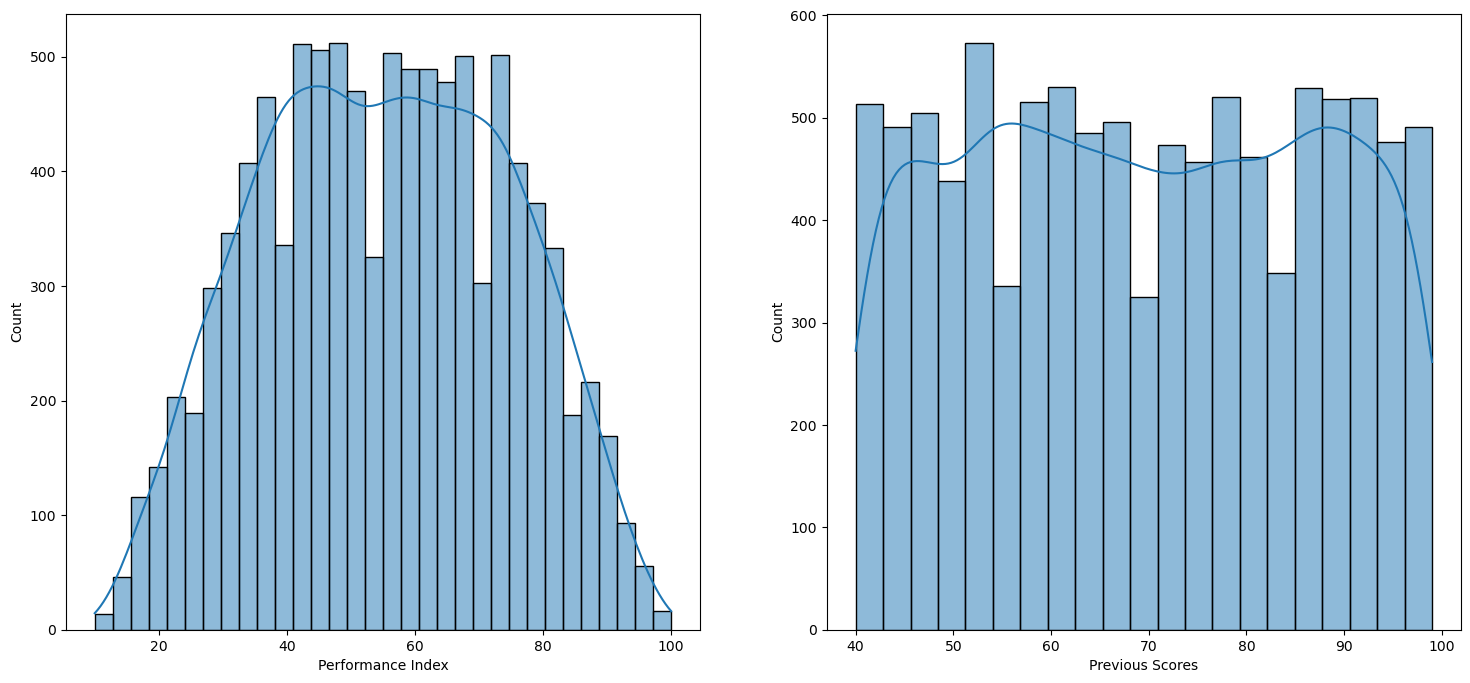

In [53]:
plt.rcParams["figure.figsize"]=(18,8)

plt.subplot(1,2,1)
sns.histplot(df["Performance Index"],kde=True)

plt.subplot(1,2,2)
sns.histplot(df["Previous Scores"],kde=True)

plt.show()

In [54]:
df[continous].skew()

Performance Index   -0.001740
Previous Scores      0.004502
dtype: float64

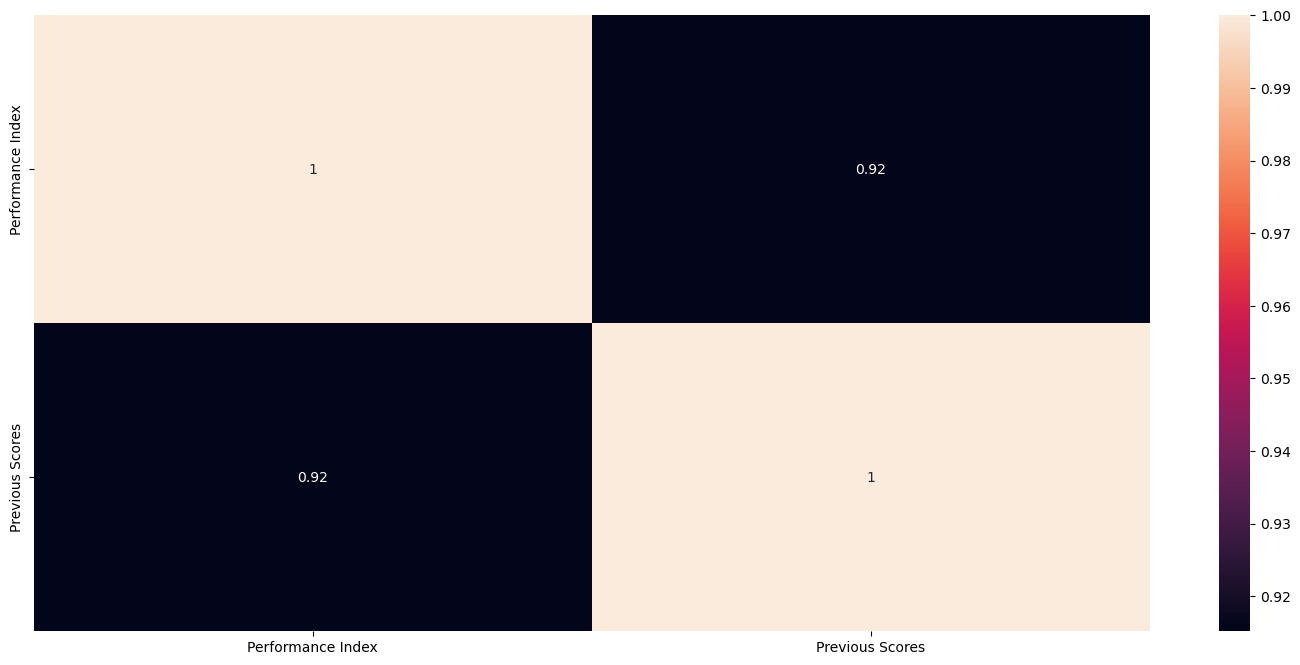

In [55]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

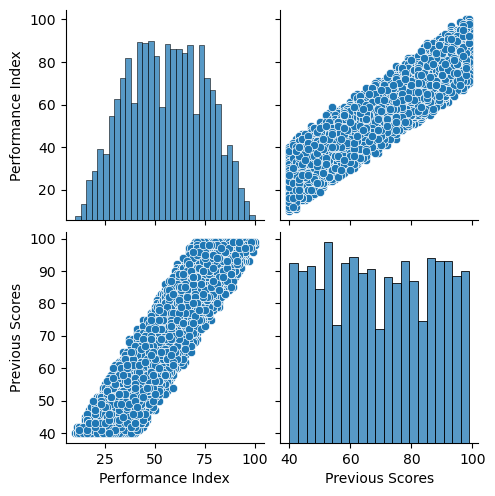

In [56]:
sns.pairplot(df[continous])
plt.show()

**Check for outliers**

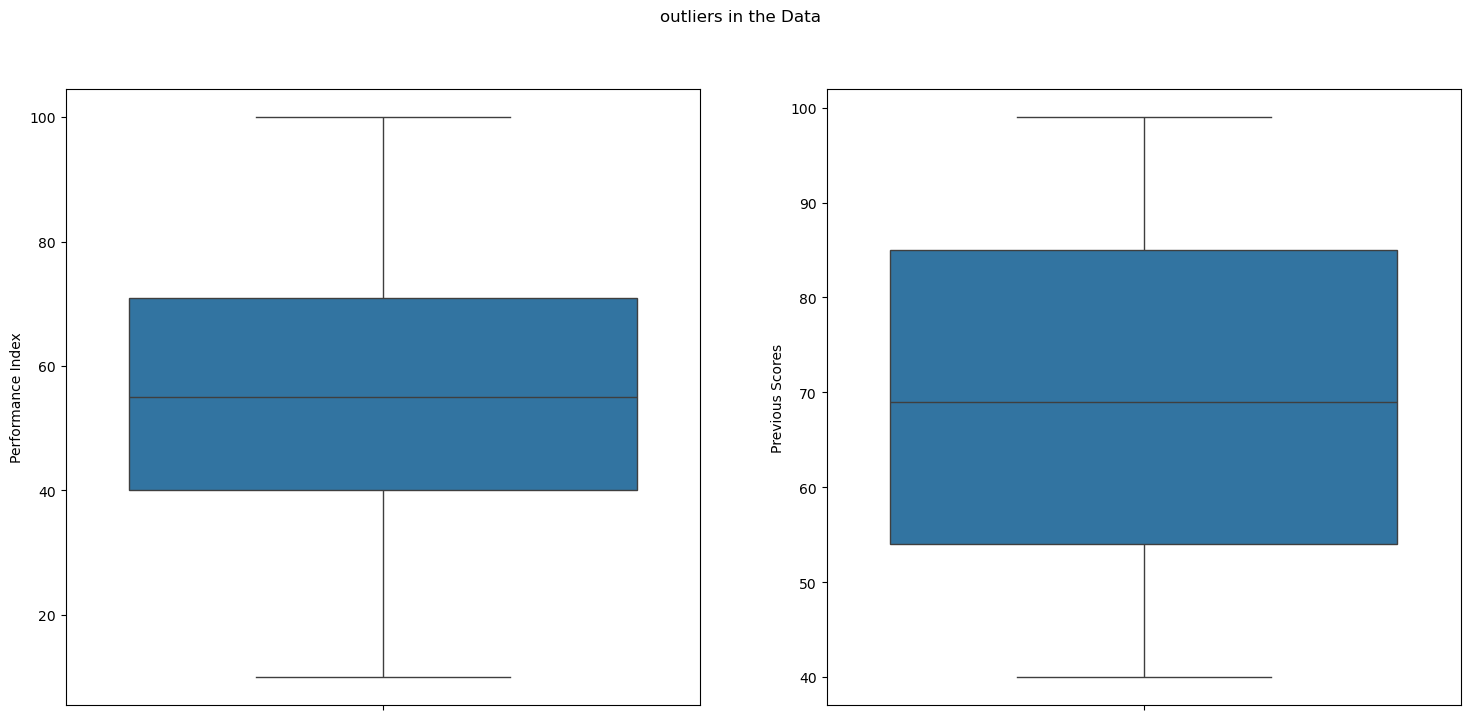

In [57]:
plt.subplot(1,2,1)
sns.boxplot(df["Performance Index"])

plt.subplot(1,2,2)
sns.boxplot(df["Previous Scores"])

plt.suptitle("outliers in the Data")
plt.show()

In [58]:
df[continous].corr()

,Performance Index,Previous Scores
Performance Index,1.000000,0.915189
Previous Scores,0.915189,1.000000


In [59]:
df.duplicated().sum()

127

In [60]:
df.drop_duplicates(inplace=True)

**Data Wrangling**

**Encoding**

In [61]:
# encoding Extracurricular Activities" column
df["Extracurricular Activities"].replace({"No":0,"Yes":1},inplace=True)

In [62]:
df.to_excel("cleaned_data_student_performance.xlsx",index=False)
